# DÙNG PHƯƠNG PHÁP TÌM ĐIỂM GẤP KHÚC (KNEE) TRÊN BIỂU ĐỒ SCREE PLOT ĐỂ XÁC ĐỊNH CHỌN SỐ LƯỢNG THÀNH PHẦN CHÍNH TRONG PCA MÀ VẪN GIỮ LẠI ĐƯỢC ĐỘ CHÍNH XÁC MONG MUỐN CỦA DỮ LIỆU

In [85]:
# đọc dữ liệu
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AirQualityUCI.csv')

In [86]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [87]:
### xử lý dữ liệu dữ liệu bị thiếu hoặc không hợp lệ
import numpy as np
# Loại bỏ các cột có giá trị không phải dạng số và cột có tất cả giá trị là NaN
data_cleaned = data.select_dtypes(include=[np.number])
data_cleaned = data_cleaned.dropna(axis=1, how='all')
# Thay thế -200 bằng NaN trên DataFrame gốc
data_cleaned = data_cleaned.replace(-200, np.nan)
# Loại bỏ các hàng có chứa giá trị NaN trong data_cleaned
data_cleaned = data_cleaned.dropna()
# Loại bỏ các cột có kiểu dữ liệu không phải dạng số
data_cleaned = data_cleaned.select_dtypes(include=[np.number])

In [88]:
data_cleaned.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [89]:
from sklearn.preprocessing import StandardScaler
### chuẩn hoá dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)
# tính tỷ lệ phương sai mà mỗi thành phần chính giải thích và phương sai tích luỹ
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


**tỷ lệ phương sai** : là tỷ lệ mà thành phần chính đó giải thích được bao nhiêu % độ chính xác của dữ liệu góc.

**vd** : thành phần chính thứ nhất là 71,42 => thành phần chính thứ nhất giải thích được 71,42% độ chính xác của dữ liệu gốc.

**phương sai tích luỹ** : phương sai tích luỹ cho ta biết khi lấy số lượng thành phần chính thì giải thích được bao nhiêu % độ chính xác của dữ liệu gốc.

**vd** : khi lấy 2 thành phần chính với thành phần chính thứ 1 giải thích được 71,42% và thành phần chính thứ 2 giải thích được 14,42% thì ta có thể giải thích được độ chính xác của dữ liệu gốc là 71,42% + 14,42% = 85,84%



In [91]:
with np.printoptions(precision=2, suppress=True):
    explained_variance_percent = explained_variance * 100
    cumulative_variance_percent = cumulative_variance * 100
    print(explained_variance_percent)
    print(cumulative_variance_percent)

[71.42 14.42  7.21  2.53  1.52  1.04  0.71  0.47  0.28  0.19  0.12  0.06
  0.02]
[ 71.42  85.84  93.04  95.57  97.1   98.14  98.85  99.32  99.6   99.79
  99.91  99.98 100.  ]


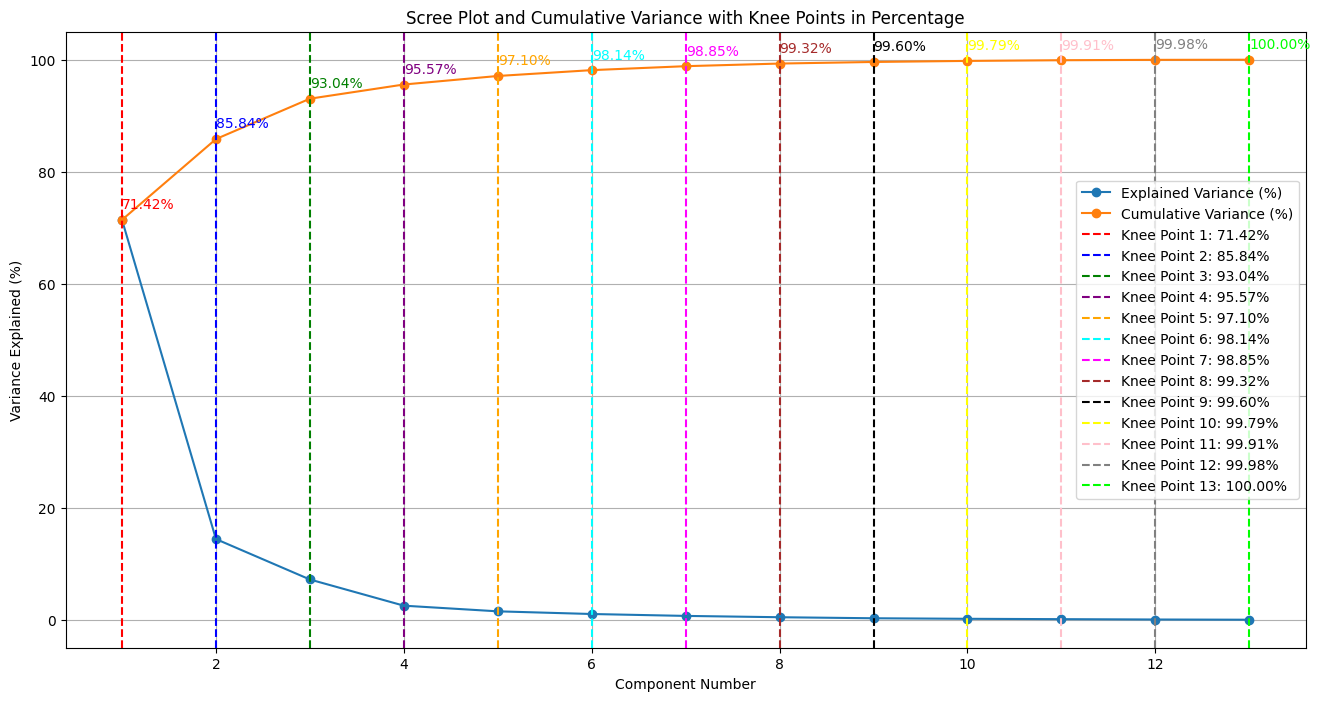

In [92]:
import matplotlib.pyplot as plt
import numpy as np
# Màu sắc cho từng điểm gấp nối
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'black', 'yellow', 'pink', 'gray', 'lime']
# Vẽ Scree Plot và phương sai tích lũy
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1, len(explained_variance_percent) + 1), explained_variance_percent, marker='o', linestyle='-', label='Explained Variance (%)')
plt.plot(np.arange(1, len(cumulative_variance_percent) + 1), cumulative_variance_percent, marker='o', linestyle='-', label='Cumulative Variance (%)')

# Đánh dấu các điểm gấp nối và hiển thị giá trị phần trăm tích lũy
for i in range(13):
    plt.axvline(x=i + 1, color=colors[i], linestyle='--', label=f'Knee Point {i+1}: {cumulative_variance_percent[i]:.2f}%')
    plt.text(i + 1, cumulative_variance_percent[i] + 2, f"{cumulative_variance_percent[i]:.2f}%", color=colors[i])

# Thêm nhãn và tiêu đề
plt.xlabel('Component Number')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot and Cumulative Variance with Knee Points in Percentage')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

# THỰC HIỆN PCA VỚI 3 THÀNH PHẦN CHÍNH

Sau khi xác định số lượng thành phần chính phù hợp với độ chính xác mong muốn, tiến hành giảm chiều dữ liệu bằng PCA với số thành phần đã chọn.

In [93]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chuẩn hoá dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)  # data_cleaned là dữ liệu đầu vào đã làm sạch
##########
# Áp dụng PCA với 3 thành phần chính
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Tạo DataFrame cho dữ liệu đã chuyển đổi sang không gian thành phần chính
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
###########

# Lấy tỷ lệ phương sai giải thích
explained_variance_ratio = pca.explained_variance_ratio_ * 100
for i in range(len(explained_variance_ratio)):
    for value in [explained_variance_ratio[i]]:
        print(f"Tỷ lệ phương sai giải thích của thành phần chính {i + 1}: {value:.2f}%")
# Tạo DataFrame cho ma trận trọng số của các thành phần chính
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=data_cleaned.columns)
print("\nMa trận trọng số của các thành phần chính:")
print(loadings)

# Xuất dữ liệu đã chuyển đổi (đã giảm số chiều) ra tệp CSV
data_pca_df.to_csv('data_pca_reduced.csv', index=False)

Tỷ lệ phương sai giải thích của thành phần chính 1: 71.42%
Tỷ lệ phương sai giải thích của thành phần chính 2: 14.42%
Tỷ lệ phương sai giải thích của thành phần chính 3: 7.21%

Ma trận trọng số của các thành phần chính:
                    PC1       PC2       PC3
CO(GT)         0.317441  0.015494 -0.169786
PT08.S1(CO)    0.314619  0.070293 -0.050415
NMHC(GT)       0.289528 -0.037604 -0.081759
C6H6(GT)       0.321400 -0.036300 -0.079855
PT08.S2(NMHC)  0.324512 -0.047245 -0.044165
NOx(GT)        0.309002  0.059366 -0.232141
PT08.S3(NOx)  -0.299033 -0.021370 -0.149814
NO2(GT)        0.294220 -0.087780 -0.125553
PT08.S4(NO2)   0.319108  0.109668  0.059697
PT08.S5(O3)    0.308342  0.091479  0.001130
T              0.141258 -0.522000  0.557810
RH            -0.044197  0.719257 -0.028675
AH             0.132412  0.409828  0.738906


1. Thành phần chính 1 (PC1)

	  •	PC1 có các trọng số dương cao đối với các biến liên quan đến mức độ ô nhiễm như CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S4(NO2), PT08.S5(O3).	Tất cả các biến này đều có trọng số lớn, nghĩa là chúng đóng góp mạnh vào PC1. PC1 sẽ thể hiện mức độ ô nhiễm của các chất như CO, NOx, và các hợp chất hữu cơ.

    => Điều này cho thấy PC1 có thể đại diện cho mức độ ô nhiễm tổng thể trong không khí.
  
    Nhận xét:

      •	PC1 là một chỉ số tổng hợp về chất lượng không khí hoặc ô nhiễm môi trường, vì nó được đóng góp mạnh bởi nhiều chỉ số liên quan đến các chất gây ô nhiễm.

2. Thành phần chính 2 (PC2)

    •	PC2 có trọng số cao nhất cho biến RH (độ ẩm tương đối) với giá trị dương lớn (0.719), và trọng số âm cho T (nhiệt độ) (-0.522).

	  => PC2 có thể đại diện cho yếu tố thời tiết hoặc khí hậu, cụ thể là sự kết hợp giữa độ ẩm và nhiệt độ, hai yếu tố thường có mối quan hệ nghịch biến với nhau.

    Nhận xét:

      •	PC2 thể hiện tác động của các yếu tố thời tiết đến chất lượng không khí. Sự đối lập giữa độ ẩm và nhiệt độ trong PC2 cho thấy đây có thể là thành phần ảnh hưởng bởi khí hậu hoặc điều kiện thời tiết.

3. Thành phần chính 3 (PC3)

	  •	PC3 có trọng số cao nhất cho các biến AH (hàm lượng nước tuyệt đối) và T (nhiệt độ), với các giá trị trọng số lần lượt là 0.738 và 0.558.

	  => PC3 có thể đại diện cho nồng độ hơi nước trong không khí hoặc mối quan hệ giữa nhiệt độ và độ ẩm tuyệt đối.

  Nhận xét:

    •	PC3 có thể cho thấy tác động của hàm lượng nước trong không khí và nhiệt độ. Đây là một chỉ số tiềm năng về tình trạng độ ẩm trong không khí, với sự ảnh hưởng của nhiệt độ.

  Tổng kết

    •	PC1 đại diện cho mức độ ô nhiễm tổng thể và có liên hệ chặt chẽ với các chỉ số chất lượng không khí.

    •	PC2 đại diện cho các yếu tố thời tiết, cụ thể là độ ẩm và nhiệt độ.

    •	PC3 phản ánh nồng độ hơi nước trong không khí và mối quan hệ với nhiệt độ.


# SO SÁNH GIỮA DỮ LIỆU TRƯỚC VÀ SAU KHI ĐƯỢC GIẢM CHIỀU


kích thước của dữ liệu trước và sau khi PCA

In [94]:
# Kích thước của bộ dữ liệu trước PCA
print(f"Kích thước của bộ dữ liệu trước PCA: {data_cleaned.shape}")
# Kích thước của bộ dữ liệu sau PCA
print(f"Kích thước của bộ dữ liệu sau PCA: {data_pca_df.shape}")

Kích thước của bộ dữ liệu trước PCA: (827, 13)
Kích thước của bộ dữ liệu sau PCA: (827, 3)


In [95]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
print(f"Phương sai tích lũy sau 3 thành phần chính: {cumulative_variance[-1]:.2f}%")

Phương sai tích lũy sau 3 thành phần chính: 93.04%


Sau khi sử dụng PCA để giảm chiều dữ liệu xuống còn 3 nhưng vẫn giữ được 97,27% độ chính xác

=> phương pháp PCA giúp giảm kích thước dữ liệu nhưng vẫn dữ được độ chính xác của phần lớn dữ liệu

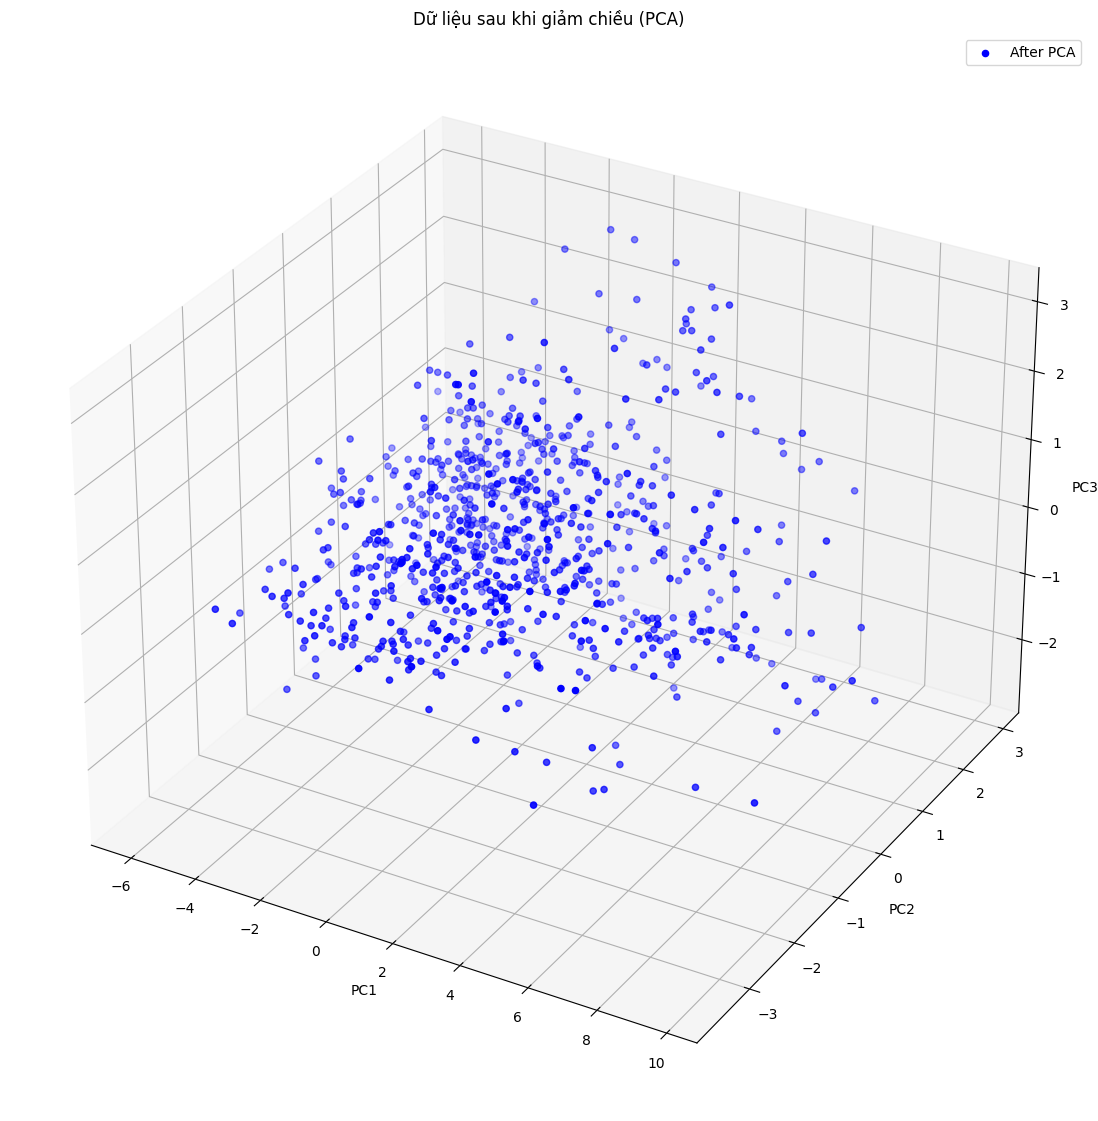

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_df.iloc[:, 0], data_pca_df.iloc[:, 1], data_pca_df.iloc[:, 2], c='blue', label ='After PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Dữ liệu sau khi giảm chiều (PCA)')
plt.legend()

plt.show()

Biểu đồ 3D cho thấy dữ liệu sau khi giảm chiều bằng PCA (với ba thành phần chính: PC1, PC2, PC3) có sự phân bố đồng đều và không còn mối tương quan tuyến tính giữa các chiều. Dữ liệu được trải rộng trong không gian mới của các thành phần chính, cho thấy rằng PCA đã giảm chiều mà vẫn giữ lại phần lớn cấu trúc phân tán tổng quát của dữ liệu gốc.

=> áp dụng PCA cho phép ta giảm xuống 2 hoặc 3 chiều, giúp dễ dàng vẽ biểu đồ và phân tích cấu trúc, cụm dữ liệu trong không gian trực quan hơn.